In [1]:
from keras.datasets import mnist


(X_train,y_train),(X_test,y_test) = mnist.load_data()
X_train.shape


(60000, 28, 28)

In [2]:
import numpy as np
num_labels = len(np.unique(y_train))
num_labels

10

In [3]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [4]:
image_size = X_train.shape[1]
image_size

28

In [5]:
#Covert the train image dimension to 4D with depth as 1 for that reshape

X_train = np.reshape(X_train,[-1,image_size,image_size,1])
X_test = np.reshape(X_test,[-1,image_size,image_size,1])

X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [6]:
input_size =(image_size,image_size,1)
kernel_size =3
batch_size = 128
pool_size = 2
filters = 64 # no of kernels used in Convultn layer
drop_out =0.2


In [ ]:
#from  keras.models import Sequential
#from  keras.layers import Conv2D,Flatten,MaxPooling2D,Input
#from keras.layers import Activation,Dropout,Dense
 

#model = Sequential()
#model.add(Conv2D(filters=filters,kernel_size=kernel_size,activation='relu',input_shape=input_size))
#model.add(MaxPooling2D(pool_size))
#model.add(Conv2D(filters=filters,kernel_size=kernel_size,activation='relu'))
#model.add(MaxPooling2D(pool_size))
#model.add(Conv2D(filters=filters,kernel_size=kernel_size,activation='relu'))
#model.add(Flatten())
#model.add(Dropout(drop_out))

#adding MLP layer with activation function softmax
#model.add(Dense(num_labels))
#model.add(Activation('softmax'))
#model.summary()

#from keras.utils import plot_model
#plot_model(model, to_file='CNN-mnist.png', show_shapes=True)

In [7]:
from  keras.layers import Conv2D,Flatten,MaxPooling2D,Input
from keras.layers import Activation,Dropout,Dense
from  keras.models import Model

input_tensor = Input(shape=input_size)

Conv2D_1 = Conv2D(filters=filters,kernel_size=kernel_size,activation='relu')(input_tensor)

MaxPooling2D_1 = MaxPooling2D(pool_size)(Conv2D_1)

Conv2D_2 = Conv2D(filters=filters,kernel_size=kernel_size,activation='relu')(MaxPooling2D_1)

MaxPooling2D_2 = MaxPooling2D(pool_size)(Conv2D_2)

Conv2D_3 = Conv2D(filters=filters,kernel_size=kernel_size,activation='relu')(MaxPooling2D_2)

flatten_output =Flatten()(Conv2D_3)
dropout_output = Dropout(drop_out)(flatten_output)

dense_layer_output = Dense(num_labels,activation='softmax')(dropout_output)

model = Model(inputs=input_tensor,outputs=dense_layer_output)
model.summary()



Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0     

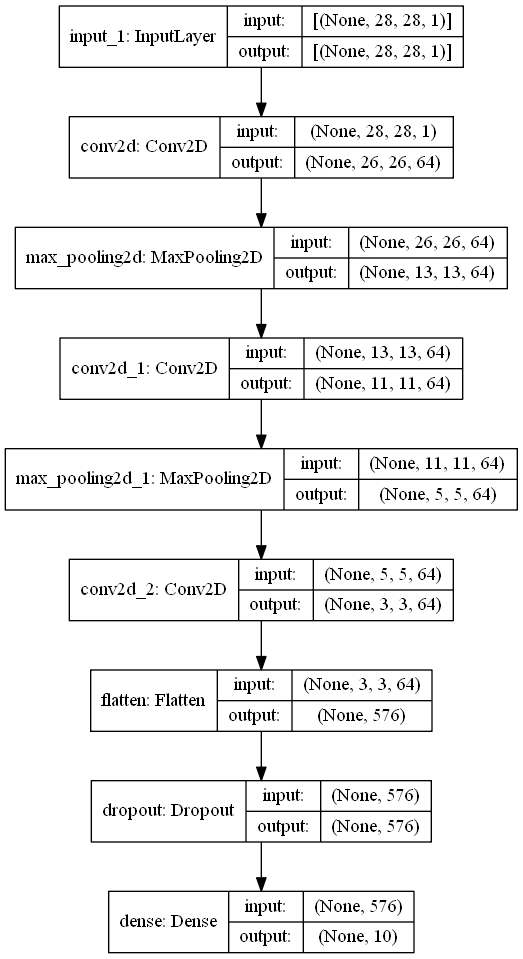

In [8]:
from keras.utils import plot_model
plot_model(model, to_file='CNN-functionalapi-mnist.png', show_shapes=True)

In [9]:
model.compile(loss='categorical_crossentropy' ,optimizer='adam',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=10,batch_size=batch_size)
loss,score = model.evaluate(X_test,y_test,batch_size=batch_size)

print('Loss : ',loss)
print('Accuracy Score : ',score)

Epoch 1/10
469/469 [==============================] - 37s 76ms/step - loss: 0.5905 - accuracy: 0.8197
Epoch 2/10
469/469 [==============================] - 37s 80ms/step - loss: 0.0790 - accuracy: 0.9749
Epoch 3/10
469/469 [==============================] - 38s 80ms/step - loss: 0.0502 - accuracy: 0.9842
Epoch 4/10
469/469 [==============================] - 41s 87ms/step - loss: 0.0403 - accuracy: 0.9873
Epoch 5/10
469/469 [==============================] - 39s 84ms/step - loss: 0.0333 - accuracy: 0.9893
Epoch 6/10
469/469 [==============================] - 38s 80ms/step - loss: 0.0295 - accuracy: 0.9902
Epoch 7/10
469/469 [==============================] - 40s 86ms/step - loss: 0.0247 - accuracy: 0.9918
Epoch 8/10
469/469 [==============================] - 39s 84ms/step - loss: 0.0209 - accuracy: 0.9932
Epoch 9/10
469/469 [==============================] - 39s 83ms/step - loss: 0.0197 - accuracy: 0.9935
Epoch 10/10
79/79 [==============================] - 2s 25ms/step - loss: 0.0212 -